In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
import sqlalchemy
import time

In [3]:
from binance.client import Client

In [4]:
from binance.streams import BinanceSocketManager

In [5]:
api_key=""
api_secret=""

client = Client(api_key,api_secret)

In [6]:
bsm = BinanceSocketManager(client)

In [7]:
socket=bsm.trade_socket('BTCUSDT')

In [8]:
def createframe(msg):
    df = pd.DataFrame([msg])
    df = df.loc[:,['s','E','p']]
    df.columns = ['symbol','Time','Price']
    df.Price = df.Price.astype(float)
    df.Time = pd.to_datetime(df.Time, unit='ms')
    return df

In [18]:
print(createframe.df)

AttributeError: 'function' object has no attribute 'df'

In [9]:
engine=sqlalchemy.create_engine('sqlite:///BTCUSDTstream.db')

In [ ]:
while True:
    await socket.__aenter__()
    try:
        msg = await socket.recv()
        # await socket.__aexit__(None, None, None)
        frame=createframe(msg)
        frame.to_sql('BTCUSDT',engine, if_exists='append',index=False)
    except:
        print("501 Server Error");
    print(frame)

    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.240  58629.49
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.324  58629.49
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.377  58629.49
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.377  58629.49
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.377  58629.49
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.378  58628.82
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.378  58628.79
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.380  58628.06
    symbol                    Time     Price
0  BTCUSDT 2024-05-01 19:12:47.380  58627.81
    symbol                    Time    Price
0  BTCUSDT 2024-05-01 19:12:47.380  58627.7
    symbol                    Time    Price
0  BTCUSDT 2024-05-01 19:12:47.386  58627.3
    symbol    

In [9]:
df=pd.read_sql('BTCUSDT',engine)

<Axes: >

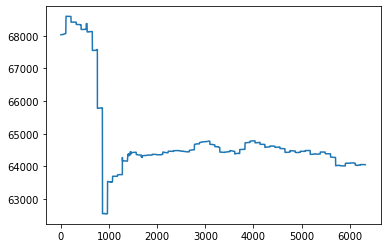

In [10]:
df.Price.plot()

In [11]:
# Preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

In [12]:
# # Generate sequences and split data into train/test sets
# sequence_length = 10
# X, y = [], []
# for i in range(len(scaled_data) - sequence_length):
#     X.append(scaled_data[i:i+sequence_length])
#     y.append(scaled_data[i+sequence_length])
# X, y = np.array(X), np.array(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

In [13]:
# Define sequence length (number of time steps to look back)
sequence_length = 50

# Create sequences for LSTM model
X = create_sequences(df['Price'].values, sequence_length)

y = X[:, -1]  # Target values are the last values in each sequence


In [14]:
# Define and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=100, batch_size=32)

Epoch 1/100


C:\Users\Om Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 4204273920.0000
Epoch 2/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4195500800.0000
Epoch 3/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4199206144.0000
Epoch 4/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4197558016.0000
Epoch 5/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 4192738304.0000
Epoch 6/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 4195578112.0000
Epoch 7/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4194376192.0000
Epoch 8/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4195200768.0000
Epoch 9/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 4191016960.0000
Epoch 10/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 4186294016.0000
Epoch 11/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4191156736.0000
Epoch 12/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4185152768.0000
Epoch 13/100
197/197 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 4183121920

In [15]:
# Predict the next 20% of values
y_pred = model.predict(X)

# Inverse transform the predicted values
y_pred_inverse = scaler.inverse_transform(y_pred)

# Print or plot the predicted values
print(y_pred_inverse)

197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
[[6095465.5]
 [6095465.5]
 [6095465.5]
 ...
 [6095465.5]
 [6095465.5]
 [6095465. ]]


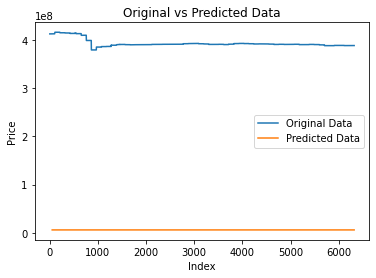

In [16]:
import matplotlib.pyplot as plt

# Inverse transform the original data
original_data_inverse = scaler.inverse_transform(df['Price'].values.reshape(-1, 1))

# Create an array of indices for plotting
indices_original = np.arange(len(df))  # For original data
indices_predicted = np.arange(sequence_length, len(df))  # For predicted data

# Plot original data
plt.plot(indices_original, original_data_inverse, label='Original Data')

# Plot predicted values
plt.plot(indices_predicted, y_pred_inverse, label='Predicted Data')

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Data')
plt.legend()
plt.show()


In [21]:
# Define LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

NameError: name 'X_train' is not defined

In [23]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32)

NameError: name 'X_train' is not defined

In [17]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


NameError: name 'X_test' is not defined

In [20]:
# Make predictions
predictions = model.predict(X_test)

# Optionally, save and load model for future use
# model.save('btc_lstm_model.h5')
# model = load_model('btc_lstm_model.h5')

NameError: name 'X_test' is not defined

NameError: name 'predictions' is not defined

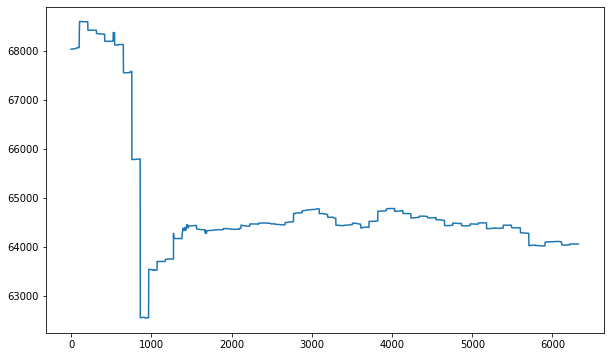

In [19]:
import matplotlib.pyplot as plt

# Plot original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Original Data')

# Plot predicted data
predicted_index = range(len(df) - len(predictions), len(df))
plt.plot(predicted_index, scaler.inverse_transform(predictions), label='Predicted Data', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('BTCUSDT Price Prediction')
plt.legend()
plt.show()

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load data from SQLite database
engine = sqlalchemy.create_engine('sqlite:///BTCUSDTstream.db')
df = pd.read_sql('BTCUSDT', engine)

# Resample data to 30-minute intervals
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df_30min = df.resample('30T').mean().ffill()

# Preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_30min['Price'].values.reshape(-1, 1))

# Generate sequences and split data into train/test sets
sequence_length = 20  # Adjust sequence length as needed
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length])
    y.append(scaled_data[i+sequence_length])
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

# Make predictions
predictions = model.predict(X_test)

# Optionally, save and load model for future use
# model.save('btc_lstm_model.h5')
# model = load_model('btc_lstm_model.h5')


C:\Users\Om Pc\AppData\Local\Temp\ipykernel_1524\966671482.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_30min = df.resample('30T').mean().ffill()


TypeError: agg function failed [how->mean,dtype->object]

AttributeError: 'NoneType' object has no attribute 'partition'